In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier


# Read the CSV and Remove Columns Deemed Low Importance

In [4]:
# Loading data USING CSV that contains cleanded values for MaritalStatus and Gender
file_path = Path("../Resources/TravelCleanedSkiLearnImputer.csv")
df = pd.read_csv(file_path)
df.head()

,customerid,prodtaken,age,citytier,occupation,gender,numberofpersonvisiting,preferredpropertystar,maritalstatus,numberoftrips,passport,owncar,numberofchildrenvisiting,designation,monthlyincome,typeofcontact,durationofpitch,numberoffollowups,productpitched,pitchsatisfactionscore
0,200000,1,41.000000,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0,Self Enquiry,6.0,3.0,Deluxe,2
1,200001,0,49.000000,1,Salaried,Male,3,4.0,Single,2.0,0,1,2.0,Manager,20130.0,Company Invited,14.0,4.0,Deluxe,3
2,200002,1,37.000000,1,Free Lancer,Male,3,3.0,Single,7.0,1,0,0.0,Executive,17090.0,Self Enquiry,8.0,4.0,Basic,3
3,200003,0,33.000000,1,Salaried,Female,2,3.0,Single,2.0,1,1,1.0,Executive,17909.0,Company Invited,9.0,3.0,Basic,5
4,200004,0,37.622265,1,Small Business,Male,2,4.0,Single,1.0,0,1,0.0,Executive,18468.0,Self Enquiry,8.0,3.0,Basic,5


In [5]:
#Drop columns not needed
features_df = df.copy()
features_df = df.drop(["prodtaken","customerid","designation","occupation"], axis=1)
features_df

,age,citytier,gender,numberofpersonvisiting,preferredpropertystar,maritalstatus,numberoftrips,passport,owncar,numberofchildrenvisiting,monthlyincome,typeofcontact,durationofpitch,numberoffollowups,productpitched,pitchsatisfactionscore
0,41.000000,3,Female,3,3.0,Single,1.0,1,1,0.0,20993.0,Self Enquiry,6.0,3.0,Deluxe,2
1,49.000000,1,Male,3,4.0,Single,2.0,0,1,2.0,20130.0,Company Invited,14.0,4.0,Deluxe,3
2,37.000000,1,Male,3,3.0,Single,7.0,1,0,0.0,17090.0,Self Enquiry,8.0,4.0,Basic,3
3,33.000000,1,Female,2,3.0,Single,2.0,1,1,1.0,17909.0,Company Invited,9.0,3.0,Basic,5
4,37.622265,1,Male,2,4.0,Single,1.0,0,1,0.0,18468.0,Self Enquiry,8.0,3.0,Basic,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,3,Male,3,4.0,Single,2.0,1,1,1.0,26576.0,Self Enquiry,9.0,5.0,Deluxe,1
4884,28.000000,1,Male,4,3.0,Single,3.0,1,1,2.0,21212.0,Company Invited,31.0,5.0,Basic,3
4885,52.000000,3,Female,4,4.0,Married,7.0,0,1,3.0,31820.0,Self Enquiry,17.0,4.0,Standard,1
4886,19.000000,3,Male,3,3.0,Single,3.0,0,0,2.0,20289.0,Self Enquiry,16.0,4.0,Basic,5


# Split the Data into Training and Testing

In [6]:
# Generate our categorical variable list
features_df_cat = features_df.dtypes[features_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
features_df[features_df_cat].nunique()

gender            2
maritalstatus     2
typeofcontact     2
productpitched    5
dtype: int64

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(features_df[features_df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(features_df_cat)
encode_df.head()

,gender_Female,gender_Male,maritalstatus_Married,maritalstatus_Single,typeofcontact_Company Invited,typeofcontact_Self Enquiry,typeofcontact_nan,productpitched_Basic,productpitched_Deluxe,productpitched_King,productpitched_Standard,productpitched_Super Deluxe
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
# Merge one-hot encoded features and drop the originals
features_df = features_df.merge(encode_df,left_index=True, right_index=True)
features_df = features_df.drop(features_df_cat,1)
features_df.head()

,age,citytier,numberofpersonvisiting,preferredpropertystar,numberoftrips,passport,owncar,numberofchildrenvisiting,monthlyincome,durationofpitch,...,maritalstatus_Married,maritalstatus_Single,typeofcontact_Company Invited,typeofcontact_Self Enquiry,typeofcontact_nan,productpitched_Basic,productpitched_Deluxe,productpitched_King,productpitched_Standard,productpitched_Super Deluxe
0,41.000000,3,3,3.0,1.0,1,1,0.0,20993.0,6.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49.000000,1,3,4.0,2.0,0,1,2.0,20130.0,14.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.000000,1,3,3.0,7.0,1,0,0.0,17090.0,8.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33.000000,1,2,3.0,2.0,1,1,1.0,17909.0,9.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37.622265,1,2,4.0,1.0,0,1,0.0,18468.0,8.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Define the features set.
X = features_df.copy()
X

,age,citytier,numberofpersonvisiting,preferredpropertystar,numberoftrips,passport,owncar,numberofchildrenvisiting,monthlyincome,durationofpitch,...,maritalstatus_Married,maritalstatus_Single,typeofcontact_Company Invited,typeofcontact_Self Enquiry,typeofcontact_nan,productpitched_Basic,productpitched_Deluxe,productpitched_King,productpitched_Standard,productpitched_Super Deluxe
0,41.000000,3,3,3.0,1.0,1,1,0.0,20993.0,6.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49.000000,1,3,4.0,2.0,0,1,2.0,20130.0,14.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.000000,1,3,3.0,7.0,1,0,0.0,17090.0,8.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33.000000,1,2,3.0,2.0,1,1,1.0,17909.0,9.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37.622265,1,2,4.0,1.0,0,1,0.0,18468.0,8.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,3,3,4.0,2.0,1,1,1.0,26576.0,9.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4884,28.000000,1,4,3.0,3.0,1,1,2.0,21212.0,31.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4885,52.000000,3,4,4.0,7.0,0,1,3.0,31820.0,17.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4886,19.000000,3,3,3.0,3.0,0,0,2.0,20289.0,16.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Define the target set.
y = df["prodtaken"]


In [11]:
# Check the balance of our target values
y.value_counts()

0    3968
1     920
Name: prodtaken, dtype: int64

In [12]:
# Scale and Normalize Data
data_scaled=StandardScaler()

# fit and transfor data
X_scaled=data_scaled.fit_transform(X)
#View first row
X_scaled[:1]

array([[ 0.37128216,  1.46836869,  0.13096606, -0.73012744, -1.22740375,
         1.56122135,  0.78239198, -1.39356846, -0.50032202, -1.14387064,
        -0.71002119, -0.78947679,  1.21601884, -1.21601884, -0.95831485,
         0.95831485, -0.63957142,  0.64751827, -0.07169979, -0.77764228,
         1.34987811, -0.22221029, -0.42304572, -0.27428265]])

In [13]:
#Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=78)


In [14]:
#view ytrain counts
y_train.value_counts()

0    2988
1     678
Name: prodtaken, dtype: int64

# Ensemble Learners

### Balanced Random Forest Classifier

In [15]:
# Resample the training data with the BalancedRandomForestClassifier
#model
brclf = BalancedRandomForestClassifier(random_state=1, n_estimators = 100)
#filt
brclf=brclf.fit(X_train, y_train)

In [16]:
# Calculated the balanced accuracy score
#predict
y_pred = brclf.predict(X_test)
# Balance accuracy report
balanced_accuracy_score(y_test, y_pred)

0.8304941811435318

In [17]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Act ProdTaken 0", "Act ProdTaken 1"], columns=["Pred ProdTaken 0", "Pred ProdTaken 1"])
cm_df

,Pred ProdTaken 0,Pred ProdTaken 1
Act ProdTaken 0,830,150
Act ProdTaken 1,45,197


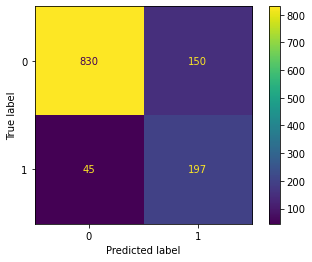

In [18]:
#Display confusion matrix using ConfusinMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=brclf.classes_)
display.plot()

#Save Image
#plt.savefig("../Images/BalancedRandomForestClassifier_confusion_matrix.png")
plt.show()

In [19]:
# Print the imbalanced classification report
print("Balanced Random Forest Classifier")
print(classification_report_imbalanced(y_test, y_pred))


Balanced Random Forest Classifier
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.85      0.81      0.89      0.83      0.69       980
          1       0.57      0.81      0.85      0.67      0.83      0.69       242

avg / total       0.87      0.84      0.82      0.85      0.83      0.69      1222



In [20]:
# List the features sorted in descending order by feature importance
by_features = sorted(zip(brclf.feature_importances_, X.columns), reverse=True)
for feature_rank in by_features:
    print(f"{feature_rank[1]}: ({feature_rank[0]})")

monthlyincome: (0.12733822500544545)
age: (0.12033736480619894)
durationofpitch: (0.10573067002412782)
passport: (0.07737633659194423)
numberoftrips: (0.06605573867757235)
pitchsatisfactionscore: (0.06001903853380784)
numberoffollowups: (0.0591095950466468)
preferredpropertystar: (0.048130228168909335)
productpitched_Basic: (0.04497322533979956)
citytier: (0.039249151097084295)
numberofchildrenvisiting: (0.03470838333885731)
numberofpersonvisiting: (0.031684712167274344)
productpitched_Deluxe: (0.025726049119490217)
owncar: (0.021331843402397358)
maritalstatus_Married: (0.01897609028359274)
gender_Female: (0.018804756084501644)
maritalstatus_Single: (0.018643431628283656)
gender_Male: (0.018627689489670148)
typeofcontact_Company Invited: (0.018201931326285416)
typeofcontact_Self Enquiry: (0.017670988656871573)
productpitched_Standard: (0.01367525326621247)
productpitched_Super Deluxe: (0.009392685572769803)
productpitched_King: (0.00338411305927134)
typeofcontact_nan: (0.00085249931298

### Easy Ensemble AdaBoost Classifier

In [21]:
# Train the EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=1, n_estimators = 100)
#fit/train
eec.fit(X_train, y_train) 

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [22]:
# Calculated the balanced accuracy score
#predict
y_pred =eec.predict(X_test)
#Balance Score
balanced_accuracy_score(y_test, y_pred)

0.72228453364817

In [23]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Act ProdTaken 0", "Act ProdTaken 1"], columns=["Pred ProdTaken 0", "Pred ProdTaken 1"])
cm_df

,Pred ProdTaken 0,Pred ProdTaken 1
Act ProdTaken 0,707,273
Act ProdTaken 1,67,175


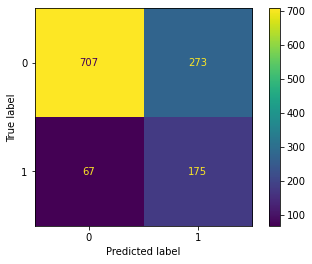

In [24]:
#Display confusion matrix using ConfusinMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eec.classes_)
display.plot()

#Save Image
#plt.savefig("../Images/EasyEnsembleClassifier_confusion_matrix.png")
plt.show()

In [25]:
# Print the imbalanced classification report
print("Easy Ensemble Classifier")
print(classification_report_imbalanced(y_test, y_pred))

Easy Ensemble Classifier
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.72      0.72      0.81      0.72      0.52       980
          1       0.39      0.72      0.72      0.51      0.72      0.52       242

avg / total       0.81      0.72      0.72      0.75      0.72      0.52      1222

